## Plotting Value added per worker across Countries.

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

## Import Data
VA_per_Emp_Nom = pd.read_csv('Data\VA_EMP_across_countries_Nominal.csv')
VA_per_Emp_Real = pd.read_csv('Data\VA_EMP_across_countries_Real.csv')

In [2]:
VA_per_Emp_Nom

,Unnamed: 0,country,year,Nom_VA_per_EMP_Agriculture,Nom_VA_per_EMP_Manufacturing,Nom_VA_per_EMP_Service
0,1,Argentina,1990,6.665838,18.813633,7.314613
1,2,Argentina,1991,14.403808,44.797220,19.419211
2,3,Argentina,1992,16.365959,52.180367,24.503975
3,4,Argentina,1993,17.053446,62.157590,27.240649
4,5,Argentina,1994,18.496934,67.969821,28.129954
...,...,...,...,...,...,...
1474,1475,Zambia,2014,4.445479,133.033532,59.435825
1475,1476,Zambia,2015,3.477682,136.597685,64.984054
1476,1477,Zambia,2016,4.963802,156.825692,67.955453
1477,1478,Zambia,2017,3.531076,199.997293,73.588057


In [3]:
VA_per_Emp_Real

,Unnamed: 0,country,year,Real_VA_per_EMP_Agriculture,Real_VA_per_EMP_Manufacturing,Real_VA_per_EMP_Service
0,1,Argentina,1990,242.370714,588.915813,296.640513
1,2,Argentina,1991,251.221930,653.330184,310.518172
2,3,Argentina,1992,255.735919,726.031915,327.469280
3,4,Argentina,1993,264.202419,831.254966,337.135648
4,5,Argentina,1994,285.948379,902.484314,356.369940
...,...,...,...,...,...,...
1474,1475,Zambia,2014,3.903854,140.227534,67.242235
1475,1476,Zambia,2015,3.477682,136.597685,64.984054
1476,1477,Zambia,2016,3.534964,136.179532,61.216960
1477,1478,Zambia,2017,3.394037,135.360787,66.882541


In [4]:
## Drop first column
VA_per_Emp_Nom = VA_per_Emp_Nom.drop(columns=['Unnamed: 0'])
VA_per_Emp_Real = VA_per_Emp_Real.drop(columns=['Unnamed: 0'])

In [5]:
### Calculate the growth of VA per worker in each sector
## All Sector.
# Nominal
VA_per_Emp_Nom_growth = VA_per_Emp_Nom.groupby('country').apply(lambda x: x[["Nom_VA_per_EMP_Agriculture", "Nom_VA_per_EMP_Manufacturing", "Nom_VA_per_EMP_Service"]].pct_change()).reset_index().rename(columns={"Nom_VA_per_EMP_Agriculture": "VA_Agriculture_growth", "Nom_VA_per_EMP_Manufacturing": "VA_Manufacturing_growth", "Nom_VA_per_EMP_Service": "VA_Service_growth"})

# Real
VA_per_Emp_Real_growth = VA_per_Emp_Real.groupby('country').apply(lambda x: x[["Real_VA_per_EMP_Agriculture", "Real_VA_per_EMP_Manufacturing", "Real_VA_per_EMP_Service"]].pct_change()).reset_index().rename(columns={"Real_VA_per_EMP_Agriculture": "VA_Agriculture_growth", "Real_VA_per_EMP_Manufacturing": "VA_Manufacturing_growth", "Real_VA_per_EMP_Service": "VA_Service_growth"})

In [6]:
VA_per_Emp_Real_growth

,country,level_1,VA_Agriculture_growth,VA_Manufacturing_growth,VA_Service_growth
0,Argentina,0,NaN,NaN,NaN
1,Argentina,1,0.036519,0.109378,0.046783
2,Argentina,2,0.017968,0.111279,0.054590
3,Argentina,3,0.033106,0.144929,0.029518
4,Argentina,4,0.082308,0.085689,0.057052
...,...,...,...,...,...
1474,Zambia,1474,-0.008820,-0.032167,-0.041055
1475,Zambia,1475,-0.109167,-0.025885,-0.033583
1476,Zambia,1476,0.016471,-0.003061,-0.057970
1477,Zambia,1477,-0.039867,-0.006012,0.092549


In [7]:
## Cbind to get the year.
# Nominal
VA_per_Emp_Nom_growth = pd.concat([VA_per_Emp_Nom[['year']], VA_per_Emp_Nom_growth], axis=1)

# Real
VA_per_Emp_Real_growth = pd.concat([VA_per_Emp_Real[['year']], VA_per_Emp_Real_growth], axis=1)

In [8]:
VA_per_Emp_Real_growth

,year,country,level_1,VA_Agriculture_growth,VA_Manufacturing_growth,VA_Service_growth
0,1990,Argentina,0,NaN,NaN,NaN
1,1991,Argentina,1,0.036519,0.109378,0.046783
2,1992,Argentina,2,0.017968,0.111279,0.054590
3,1993,Argentina,3,0.033106,0.144929,0.029518
4,1994,Argentina,4,0.082308,0.085689,0.057052
...,...,...,...,...,...,...
1474,2014,Zambia,1474,-0.008820,-0.032167,-0.041055
1475,2015,Zambia,1475,-0.109167,-0.025885,-0.033583
1476,2016,Zambia,1476,0.016471,-0.003061,-0.057970
1477,2017,Zambia,1477,-0.039867,-0.006012,0.092549


In [9]:
## Use data from WB to get the GDP per capita
data_WB = pd.read_excel("Data\P_Data_Extract_From_World_Development_Indicators.xlsx")

In [10]:
### Pivot the WB data. Have each Series as a dataframe.
# GDP
GDP_DF = data_WB[data_WB['Series Name'] == 'GDP per capita, PPP (constant 2017 international $)']
# Agricultural Employment
Agri_Emp_DF = data_WB[data_WB['Series Name'] == 'Employment in agriculture (% of total employment) (modeled ILO estimate)']

## Have each year as a row.
GDP_DF = GDP_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'GDP')
Agri_Emp_DF = Agri_Emp_DF.melt(id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name = 'Year', value_name = 'Agri_Emp')

In [11]:
## Keep only the first 4 characters of the year.
GDP_DF['Year'] = GDP_DF['Year'].str[:4]
Agri_Emp_DF['Year'] = Agri_Emp_DF['Year'].str[:4]

## Convert the year to integer.
GDP_DF['Year'] = GDP_DF['Year'].astype(int)

In [12]:
GDP_DF

,Country Name,Country Code,Series Name,Series Code,Year,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
1,Albania,ALB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,3264.814253
2,Algeria,DZA,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,8471.527605
3,American Samoa,ASM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
4,Andorra,AND,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,1992,..
...,...,...,...,...,...,...
6722,Virgin Islands (U.S.),VIR,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,..
6723,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,5722.409175
6724,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,..
6725,Zambia,ZMB,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,2022,3365.87378


## Plotting

## Within country (Thailand)

### Nominal value added per worker

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

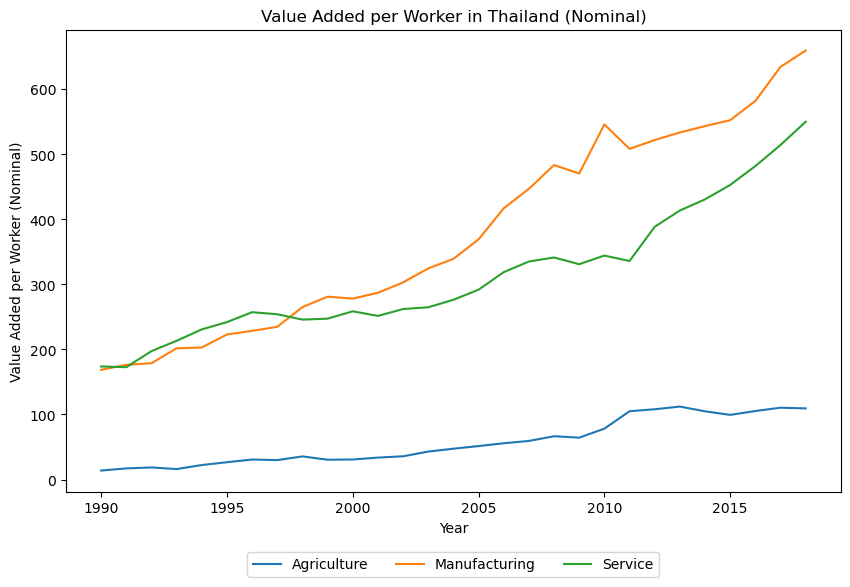

In [13]:
plt.figure(figsize=(10, 6))

## Plot Agricultural Value Added per Worker
sns.lineplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_VA_per_EMP_Agriculture', label='Agriculture')

## Plot Manufacturing Value Added per Worker
sns.lineplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_VA_per_EMP_Manufacturing', label='Manufacturing')

## Plot Service Value Added per Worker
sns.lineplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_VA_per_EMP_Service', label='Service')

## Axis labels
plt.xlabel('Year')
plt.ylabel('Value Added per Worker (Nominal)')

## Title
plt.title('Value Added per Worker in Thailand (Nominal)')

# Legend outside the plot. At the bottom center
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

### Real value added per worker

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

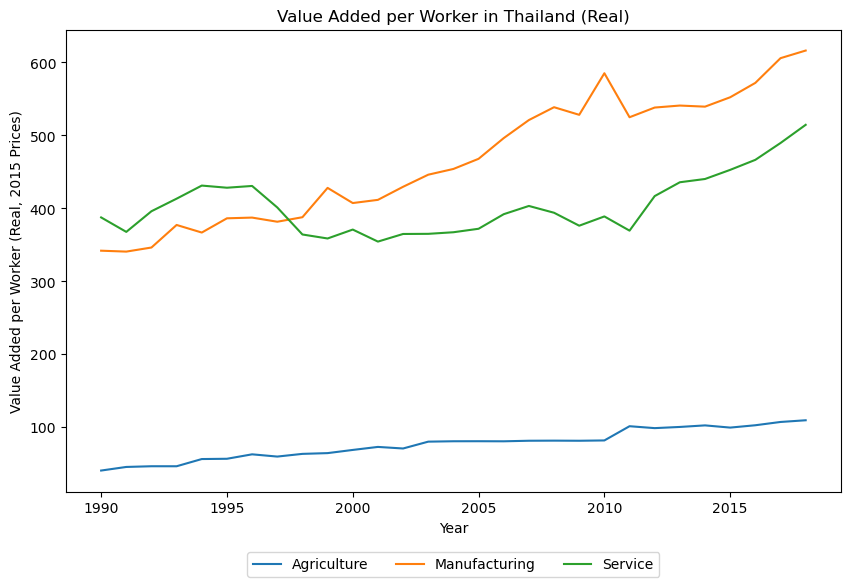

In [14]:
plt.figure(figsize=(10, 6))

## Plot Agricultural Value Added per Worker
sns.lineplot(data=VA_per_Emp_Real[VA_per_Emp_Real['country'] == 'Thailand'], x='year', y='Real_VA_per_EMP_Agriculture', label='Agriculture')

## Plot Manufacturing Value Added per Worker
sns.lineplot(data=VA_per_Emp_Real[VA_per_Emp_Real['country'] == 'Thailand'], x='year', y='Real_VA_per_EMP_Manufacturing', label='Manufacturing')

## Plot Service Value Added per Worker
sns.lineplot(data=VA_per_Emp_Real[VA_per_Emp_Real['country'] == 'Thailand'], x='year', y='Real_VA_per_EMP_Service', label='Service')

## Axis labels
plt.xlabel('Year')
plt.ylabel('Value Added per Worker (Real, 2015 Prices)')

## Title
plt.title('Value Added per Worker in Thailand (Real)')

# Legend outside the plot. At the bottom center
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

### Growth rate of value added per worker in each sector.

In [15]:
### Compute the growth rate over the whole period of Thailand froom 1990 to 2018.

## Nominal
# Agriculture. 
VA_Agriculture_growth_Thailand = VA_per_Emp_Nom_growth[(VA_per_Emp_Nom_growth['country'] == 'Thailand') & (VA_per_Emp_Nom_growth['year'] >= 1990) & (VA_per_Emp_Nom_growth['year'] <= 2018)]['VA_Agriculture_growth']

VA_Agriculture_growth_Thailand.dropna(inplace=True)


## Compute the growth rate
VA_Agriculture_mean_growth_Thailand = VA_Agriculture_growth_Thailand.mean()*100

# Manufacturing
VA_Manufacturing_growth_Thailand = VA_per_Emp_Nom_growth[(VA_per_Emp_Nom_growth['country'] == 'Thailand') & (VA_per_Emp_Nom_growth['year'] >= 1990) & (VA_per_Emp_Nom_growth['year'] <= 2018)]['VA_Manufacturing_growth']

VA_Manufacturing_growth_Thailand.dropna(inplace=True)

## Compute the growth rate
VA_Manufacturing_mean_growth_Thailand = VA_Manufacturing_growth_Thailand.mean()*100

# Service
VA_Service_growth_Thailand = VA_per_Emp_Nom_growth[(VA_per_Emp_Nom_growth['country'] == 'Thailand') & (VA_per_Emp_Nom_growth['year'] >= 1990) & (VA_per_Emp_Nom_growth['year'] <= 2018)]['VA_Service_growth']

VA_Service_growth_Thailand.dropna(inplace=True)

## Compute the growth rate
VA_Service_mean_growth_Thailand = VA_Service_growth_Thailand.mean()*100

### Combine into a dataframe
VA_growth_Thailand_nom = pd.DataFrame({'Sector': ['Agriculture', 'Manufacturing', 'Service'], 'Mean Growth Rate (%)': [VA_Agriculture_mean_growth_Thailand, VA_Manufacturing_mean_growth_Thailand, VA_Service_mean_growth_Thailand]})

VA_growth_Thailand_nom

C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\2163249253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_Agriculture_growth_Thailand.dropna(inplace=True)
C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\2163249253.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_Manufacturing_growth_Thailand.dropna(inplace=True)
C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\2163249253.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Sector,Mean Growth Rate (%)
0,Agriculture,8.366854
1,Manufacturing,5.110238
2,Service,4.302820


In [16]:
### Compute the growth rate over the whole period of Thailand froom 1990 to 2018.

## Real
# Agriculture.
VA_Agriculture_growth_Thailand = VA_per_Emp_Real_growth[(VA_per_Emp_Real_growth['country'] == 'Thailand') & (VA_per_Emp_Real_growth['year'] >= 1990) & (VA_per_Emp_Real_growth['year'] <= 2018)]['VA_Agriculture_growth']

VA_Agriculture_growth_Thailand.dropna(inplace=True)

## Compute the growth rate
VA_Agriculture_mean_growth_Thailand = VA_Agriculture_growth_Thailand.mean()*100

# Manufacturing
VA_Manufacturing_growth_Thailand = VA_per_Emp_Real_growth[(VA_per_Emp_Real_growth['country'] == 'Thailand') & (VA_per_Emp_Real_growth['year'] >= 1990) & (VA_per_Emp_Real_growth['year'] <= 2018)]['VA_Manufacturing_growth']

VA_Manufacturing_growth_Thailand.dropna(inplace=True)

## Compute the growth rate
VA_Manufacturing_mean_growth_Thailand = VA_Manufacturing_growth_Thailand.mean()*100

# Service
VA_Service_growth_Thailand = VA_per_Emp_Real_growth[(VA_per_Emp_Real_growth['country'] == 'Thailand') & (VA_per_Emp_Real_growth['year'] >= 1990) & (VA_per_Emp_Real_growth['year'] <= 2018)]['VA_Service_growth']

VA_Service_growth_Thailand.dropna(inplace=True)

## Compute the growth rate
VA_Service_mean_growth_Thailand = VA_Service_growth_Thailand.mean()*100

### Combine into a dataframe
VA_growth_Thailand_real = pd.DataFrame({'Sector': ['Agriculture', 'Manufacturing', 'Service'], 'Mean Growth Rate (%)': [VA_Agriculture_mean_growth_Thailand, VA_Manufacturing_mean_growth_Thailand, VA_Service_mean_growth_Thailand]})
VA_growth_Thailand_real

C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\3071216552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_Agriculture_growth_Thailand.dropna(inplace=True)
C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\3071216552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_Manufacturing_growth_Thailand.dropna(inplace=True)
C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\3071216552.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Sector,Mean Growth Rate (%)
0,Agriculture,3.822261
1,Manufacturing,2.220288
2,Service,1.127104


## International Comparison of Value Added per Worker

Since it is in difference currency, I express the value added per worker in manufacturing sector and service sector relative to the value added per worker in the agriculture sector instead.

In [17]:
### Create a new column MANU_VA_per_EMP_Relative_to_Agriculture and SERV_VA_per_EMP_Relative_to_Agriculture. Real and Nominal.

## Nominal.
VA_per_Emp_Nom['Nom_MANU_VA_per_EMP_Relative_to_Agriculture'] = VA_per_Emp_Nom.Nom_VA_per_EMP_Manufacturing.div(VA_per_Emp_Nom.Nom_VA_per_EMP_Agriculture)
VA_per_Emp_Nom['Nom_SERV_VA_per_EMP_Relative_to_Agriculture'] = VA_per_Emp_Nom.Nom_VA_per_EMP_Service.div(VA_per_Emp_Nom.Nom_VA_per_EMP_Agriculture)

## Real.
VA_per_Emp_Real['Real_MANU_VA_per_EMP_Relative_to_Agriculture'] = VA_per_Emp_Real.Real_VA_per_EMP_Manufacturing.div(VA_per_Emp_Real.Real_VA_per_EMP_Agriculture)
VA_per_Emp_Real['Real_SERV_VA_per_EMP_Relative_to_Agriculture'] = VA_per_Emp_Real.Real_VA_per_EMP_Service.div(VA_per_Emp_Real.Real_VA_per_EMP_Agriculture)


In [18]:
VA_per_Emp_Nom

,country,year,Nom_VA_per_EMP_Agriculture,Nom_VA_per_EMP_Manufacturing,Nom_VA_per_EMP_Service,Nom_MANU_VA_per_EMP_Relative_to_Agriculture,Nom_SERV_VA_per_EMP_Relative_to_Agriculture
0,Argentina,1990,6.665838,18.813633,7.314613,2.822396,1.097328
1,Argentina,1991,14.403808,44.797220,19.419211,3.110096,1.348200
2,Argentina,1992,16.365959,52.180367,24.503975,3.188348,1.497253
3,Argentina,1993,17.053446,62.157590,27.240649,3.644870,1.597369
4,Argentina,1994,18.496934,67.969821,28.129954,3.674653,1.520790
...,...,...,...,...,...,...,...
1474,Zambia,2014,4.445479,133.033532,59.435825,29.925580,13.369949
1475,Zambia,2015,3.477682,136.597685,64.984054,39.278368,18.686024
1476,Zambia,2016,4.963802,156.825692,67.955453,31.593863,13.690201
1477,Zambia,2017,3.531076,199.997293,73.588057,56.639192,20.840123


Since we have so many countries use a combination of color and markers. Plot Thailand with a different marker.

### Nominal value added per worker

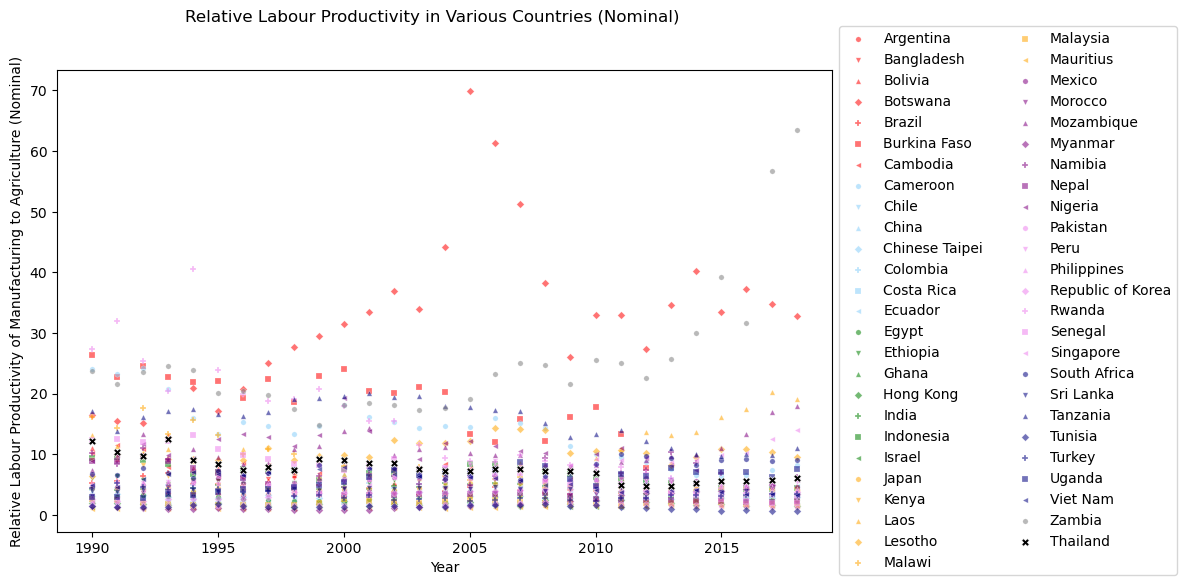

In [19]:
### Plotting relative productivity of Manufacturing to Agriculture sector in each country.

plt.figure(figsize=(10, 6))
## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D', 'P', 's', '<']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(VA_per_Emp_Nom[VA_per_Emp_Nom['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == country], x='year', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 15)

## Plot Thailand.
sns.scatterplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('Year')
plt.ylabel('Relative Labour Productivity of Manufacturing to Agriculture (Nominal)')

# Add title
plt.suptitle('Relative Labour Productivity in Various Countries (Nominal)')

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

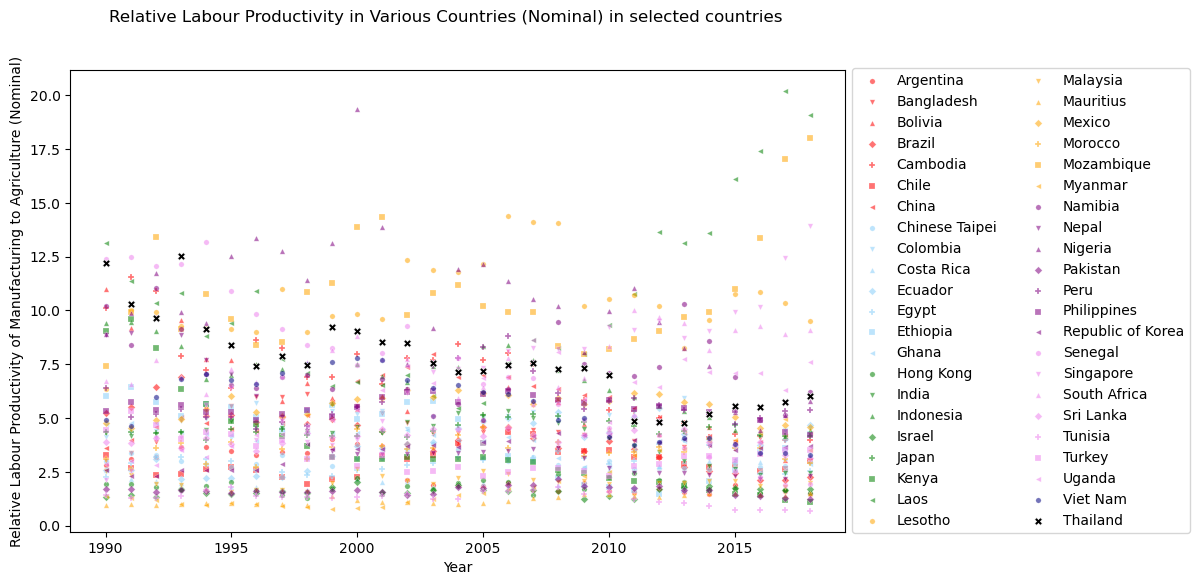

In [20]:
### Let's see those with relative productivity of Manufacturing to Agriculture sector in 1990 less than 15.
## Sebset the data.
# Get the name of the countries with relative productivity of Manufacturing to Agriculture sector in 1990 less than 15.
countries_with_relative_productivity_less_than_15 = VA_per_Emp_Nom[(VA_per_Emp_Nom['year'] == 1990) & (VA_per_Emp_Nom['Nom_MANU_VA_per_EMP_Relative_to_Agriculture'] < 15)]['country'].unique()

## Subset the data.
subset_data = VA_per_Emp_Nom[VA_per_Emp_Nom['country'].isin(countries_with_relative_productivity_less_than_15)]

## Plotting.
plt.figure(figsize=(10, 6))
## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D', 'P', 's', '<']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(subset_data[subset_data['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=subset_data[subset_data['country'] == country], x='year', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 15)

## Plot Thailand.
sns.scatterplot(data=subset_data[subset_data['country'] == 'Thailand'], x='year', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('Year')
plt.ylabel('Relative Labour Productivity of Manufacturing to Agriculture (Nominal)')

# Add title
plt.suptitle('Relative Labour Productivity in Various Countries (Nominal) in selected countries')

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

#### Services

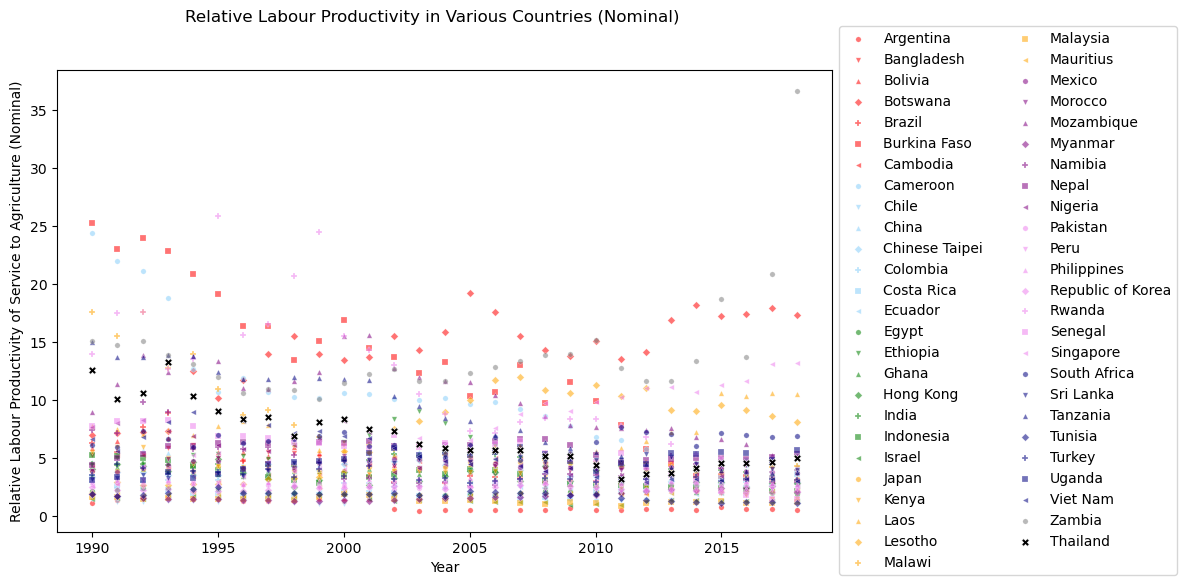

In [21]:
### Plotting relative productivity of Service to Agriculture sector in each country.

plt.figure(figsize=(10, 6))
## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D', 'P', 's', '<']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(VA_per_Emp_Nom[VA_per_Emp_Nom['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == country], x='year', y='Nom_SERV_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 15)

## Plot Thailand.
sns.scatterplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_SERV_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('Year')
plt.ylabel('Relative Labour Productivity of Service to Agriculture (Nominal)')

# Add title
plt.suptitle('Relative Labour Productivity in Various Countries (Nominal)')

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

### Relative Productivity within Thailand

####  Nominal

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

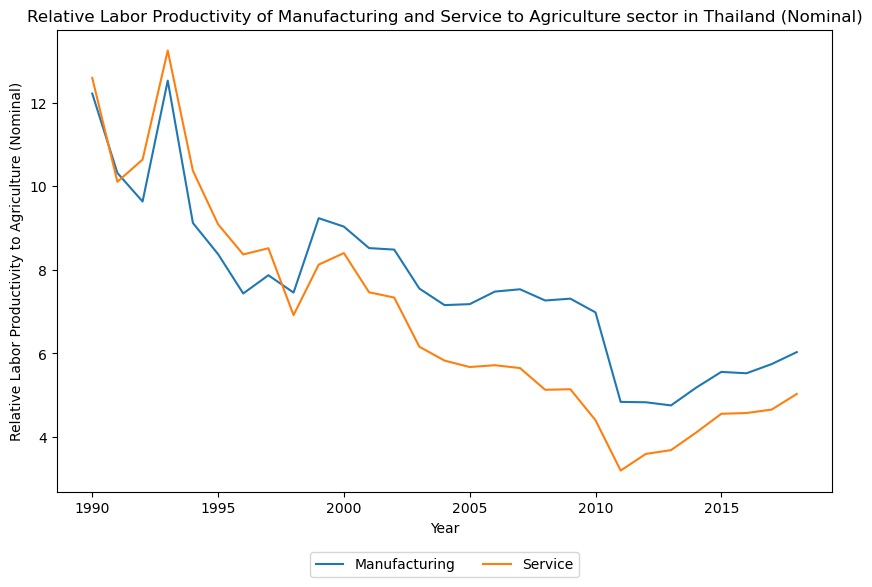

In [22]:
### PLot the relative productivity of Manufacturing and Service to Agriculture sector in Thailand.
plt.figure(figsize=(10, 6))

## Plot Relative Productivity of Manufacturing to Agriculture sector.
sns.lineplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label='Manufacturing')

## Plot Relative Productivity of Service to Agriculture sector.
sns.lineplot(data=VA_per_Emp_Nom[VA_per_Emp_Nom['country'] == 'Thailand'], x='year', y='Nom_SERV_VA_per_EMP_Relative_to_Agriculture', label='Service')

## Axis labels
plt.xlabel('Year')
plt.ylabel('Relative Labor Productivity to Agriculture (Nominal)')

## Title
plt.title('Relative Labor Productivity of Manufacturing and Service to Agriculture sector in Thailand (Nominal)')

# Legend outside the plot. At the bottom center
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)


#### Real

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

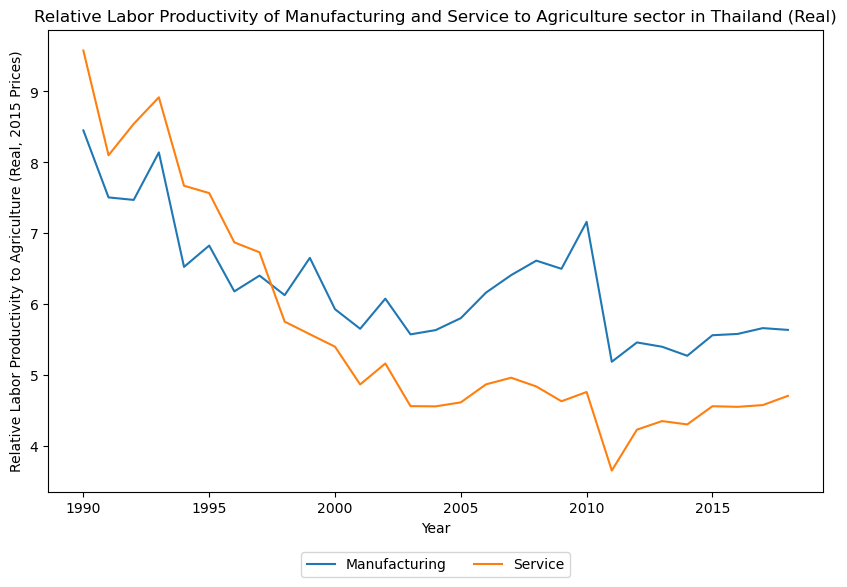

In [23]:
### PLot the relative productivity of Manufacturing and Service to Agriculture sector in Thailand.
plt.figure(figsize=(10, 6))

## Plot Relative Productivity of Manufacturing to Agriculture sector.
sns.lineplot(data=VA_per_Emp_Real[VA_per_Emp_Real['country'] == 'Thailand'], x='year', y='Real_MANU_VA_per_EMP_Relative_to_Agriculture', label='Manufacturing')

## Plot Relative Productivity of Service to Agriculture sector.
sns.lineplot(data=VA_per_Emp_Real[VA_per_Emp_Real['country'] == 'Thailand'], x='year', y='Real_SERV_VA_per_EMP_Relative_to_Agriculture', label='Service')

## Axis labels
plt.xlabel('Year')
plt.ylabel('Relative Labor Productivity to Agriculture (Real, 2015 Prices)')

## Title
plt.title('Relative Labor Productivity of Manufacturing and Service to Agriculture sector in Thailand (Real)')

# Legend outside the plot. At the bottom center
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

## Explore relationship between relative productivity and GDP per capita.

In [24]:
### Merge the GDP and value added per worker data.
# Nominal
Merged_df_Nom = pd.merge(VA_per_Emp_Nom, GDP_DF, left_on=['country', 'year'], right_on=['Country Name', 'Year'], how='inner')

## Drop the columns which are not needed.
Merged_df_Nom = Merged_df_Nom.drop(columns=['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year'])

Merged_df_Nom

,country,year,Nom_VA_per_EMP_Agriculture,Nom_VA_per_EMP_Manufacturing,Nom_VA_per_EMP_Service,Nom_MANU_VA_per_EMP_Relative_to_Agriculture,Nom_SERV_VA_per_EMP_Relative_to_Agriculture,GDP
0,Argentina,1992,16.365959,52.180367,24.503975,3.188348,1.497253,16190.510706
1,Argentina,1993,17.053446,62.157590,27.240649,3.644870,1.597369,17282.96499
2,Argentina,1994,18.496934,67.969821,28.129954,3.674653,1.520790,18046.892918
3,Argentina,1995,20.264721,70.518163,30.065436,3.479849,1.483634,17303.923849
4,Argentina,1996,22.770524,74.638821,29.939642,3.277870,1.314842,18031.548191
...,...,...,...,...,...,...,...,...
1210,Zambia,2014,4.445479,133.033532,59.435825,29.925580,13.369949,3375.94127
1211,Zambia,2015,3.477682,136.597685,64.984054,39.278368,18.686024,3365.379259
1212,Zambia,2016,4.963802,156.825692,67.955453,31.593863,13.690201,3384.268144
1213,Zambia,2017,3.531076,199.997293,73.588057,56.639192,20.840123,3395.479686


In [25]:
### Merge the GDP and value added per worker data.
# Real
Merged_df_Real = pd.merge(VA_per_Emp_Real, GDP_DF, left_on=['country', 'year'], right_on=['Country Name', 'Year'], how='inner')

## Drop the columns which are not needed.
Merged_df_Real = Merged_df_Real.drop(columns=['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Year'])

Merged_df_Real


,country,year,Real_VA_per_EMP_Agriculture,Real_VA_per_EMP_Manufacturing,Real_VA_per_EMP_Service,Real_MANU_VA_per_EMP_Relative_to_Agriculture,Real_SERV_VA_per_EMP_Relative_to_Agriculture,GDP
0,Argentina,1992,255.735919,726.031915,327.469280,2.838991,1.280498,16190.510706
1,Argentina,1993,264.202419,831.254966,337.135648,3.146281,1.276051,17282.96499
2,Argentina,1994,285.948379,902.484314,356.369940,3.156109,1.246274,18046.892918
3,Argentina,1995,313.557132,907.209324,364.934046,2.893282,1.163852,17303.923849
4,Argentina,1996,314.942516,960.843193,375.845508,3.050853,1.193378,18031.548191
...,...,...,...,...,...,...,...,...
1210,Zambia,2014,3.903854,140.227534,67.242235,35.920278,17.224576,3375.94127
1211,Zambia,2015,3.477682,136.597685,64.984054,39.278368,18.686024,3365.379259
1212,Zambia,2016,3.534964,136.179532,61.216960,38.523596,17.317561,3384.268144
1213,Zambia,2017,3.394037,135.360787,66.882541,39.881945,19.705898,3395.479686


In [26]:
## Get the names of the 20 countries which had the closest GDP to Thailand in 1993.
# Make GDP numeric.
GDP_DF['GDP'] = pd.to_numeric(GDP_DF['GDP'], errors='coerce')
## DF with the GDP in 1993
GDP_1993 = GDP_DF[GDP_DF['Year'] == 1993]

## Get the GDP of Thailand in 1993
GDP_Thailand_1993 = GDP_1993[GDP_1993['Country Name'] == 'Thailand']['GDP'].values[0]

## Get the 20 countries with GDP closest to Thailand in 1993.
GDP_1993['GDP_diff'] = np.abs(GDP_1993['GDP'] - GDP_Thailand_1993)

## Sort the data.
GDP_1993 = GDP_1993.sort_values('GDP_diff')

## Get the top 20 countries.
top_20_countries = GDP_1993.head(72)['Country Name'].values

top_20_countries

C:\Users\fphak\AppData\Local\Temp\ipykernel_13396\858392704.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_1993['GDP_diff'] = np.abs(GDP_1993['GDP'] - GDP_Thailand_1993)


array(['Thailand', 'Colombia', 'Paraguay', 'North Macedonia', 'Jordan',
       'Mauritius', 'Dominica', 'Ecuador', 'Fiji', 'Grenada', 'Botswana',
       'Algeria', 'South Africa', 'Belize', 'Jamaica',
       'Iran, Islamic Rep.', 'Kazakhstan', 'Belarus', 'Brazil',
       'St. Vincent and the Grenadines', 'Dominican Republic', 'Lebanon',
       'Bulgaria', 'Costa Rica', 'Trinidad and Tobago', 'Romania',
       'Poland', 'Namibia', 'Egypt, Arab Rep.', 'Ukraine', 'Tunisia',
       'Guyana', 'Chile', 'Guatemala', 'Slovak Republic', 'St. Lucia',
       'El Salvador', 'Turkmenistan', 'Peru', 'Indonesia', 'Uruguay',
       'Barbados', 'Malaysia', 'Congo, Rep.', 'Suriname', 'Eswatini',
       'Bolivia', 'Sri Lanka', 'Mauritania', 'Panama', 'Azerbaijan',
       'Iraq', 'Turkiye', 'Morocco', 'Philippines', 'Tonga', 'Honduras',
       "Cote d'Ivoire", 'Papua New Guinea', 'Mongolia', 'Angola',
       'Marshall Islands', 'Samoa', 'Albania', 'Kenya', 'Kyrgyz Republic',
       'Georgia', 'Bhutan', 'M

In [27]:
## Subset the data.
Merged_df_Nom_subset = Merged_df_Nom[Merged_df_Nom['country'].isin(top_20_countries)]
Merged_df_Real_subset = Merged_df_Real[Merged_df_Real['country'].isin(top_20_countries)]

## Exclude Botswana. Since a drastically different data.
Merged_df_Nom_subset = Merged_df_Nom_subset[Merged_df_Nom_subset['country'] != 'Botswana']
Merged_df_Real_subset = Merged_df_Real_subset[Merged_df_Real_subset['country'] != 'Botswana']

In [28]:
Merged_df_Nom_subset.country.unique()

array(['Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Ecuador',
       'Indonesia', 'Kenya', 'Malaysia', 'Mauritius', 'Morocco',
       'Namibia', 'Pakistan', 'Peru', 'Philippines', 'South Africa',
       'Sri Lanka', 'Thailand', 'Tunisia'], dtype=object)

In [29]:
## Only include the years from 1993.
Merged_df_Nom_subset = Merged_df_Nom_subset[Merged_df_Nom_subset['year'] >= 1993]

### Nominal

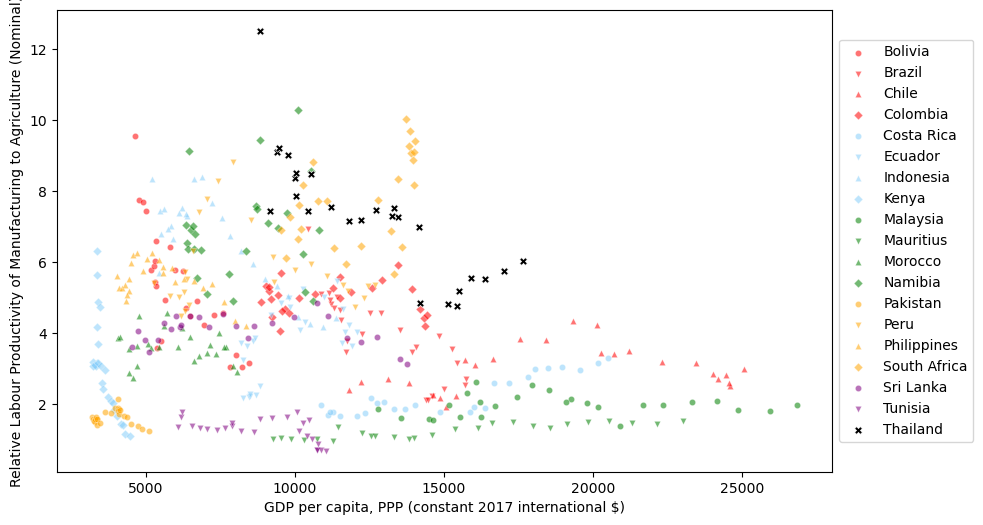

In [30]:
### Scatter plot of GDP per capita and Relative Productivity of Manufacturing to Agriculture sector. Using only the top 20 countries.
plt.figure(figsize=(10, 6))

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(Merged_df_Nom_subset[Merged_df_Nom_subset['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=Merged_df_Nom_subset[Merged_df_Nom_subset['country'] == country], x='GDP', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 20)

## Plot Thailand.
sns.scatterplot(data=Merged_df_Nom_subset[Merged_df_Nom_subset['country'] == 'Thailand'], x='GDP', y='Nom_MANU_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Relative Labour Productivity of Manufacturing to Agriculture (Nominal)')


# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


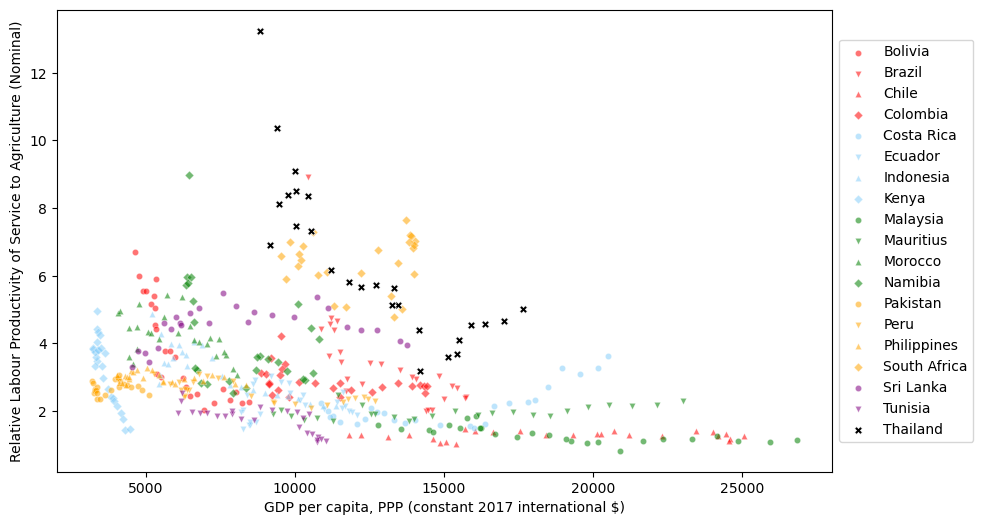

In [31]:
### Scatter plot of GDP per capita and Relative Productivity of Service to Agriculture sector. Using only the top 20 countries.
plt.figure(figsize=(10, 6))

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(Merged_df_Nom_subset[Merged_df_Nom_subset['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=Merged_df_Nom_subset[Merged_df_Nom_subset['country'] == country], x='GDP', y='Nom_SERV_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 20)

## Plot Thailand.
sns.scatterplot(data=Merged_df_Nom_subset[Merged_df_Nom_subset['country'] == 'Thailand'], x='GDP', y='Nom_SERV_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Relative Labour Productivity of Service to Agriculture (Nominal)')


# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

### Real

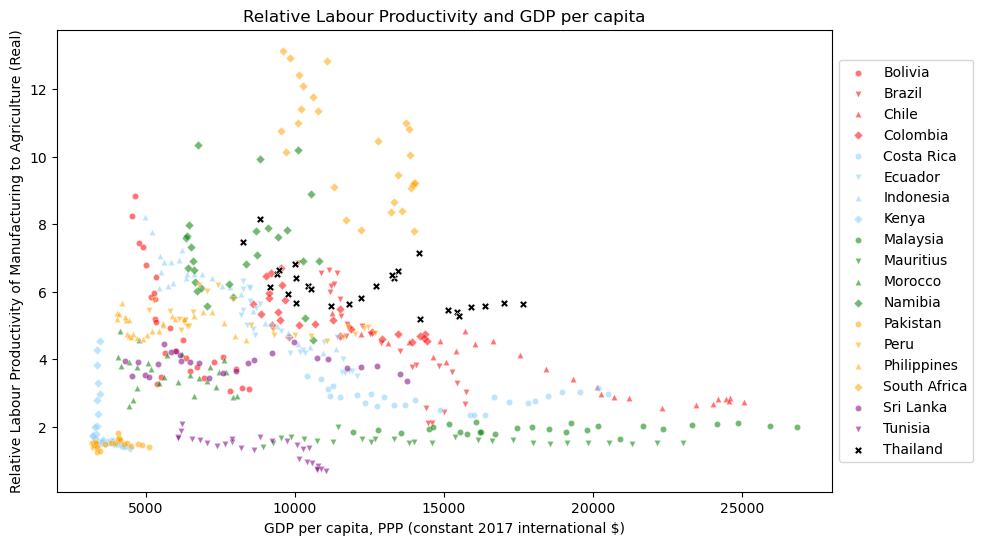

In [32]:
### Scatter plot of GDP per capita and Relative Productivity of Manufacturing to Agriculture sector. Using only the top 20 countries.
plt.figure(figsize=(10, 6))

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(Merged_df_Real_subset[Merged_df_Real_subset['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=Merged_df_Real_subset[Merged_df_Real_subset['country'] == country], x='GDP', y='Real_MANU_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 20)

## Plot Thailand.
sns.scatterplot(data=Merged_df_Real_subset[Merged_df_Real_subset['country'] == 'Thailand'], x='GDP', y='Real_MANU_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Relative Labour Productivity of Manufacturing to Agriculture (Real)')

# Add title
plt.title('Relative Labour Productivity and GDP per capita')

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

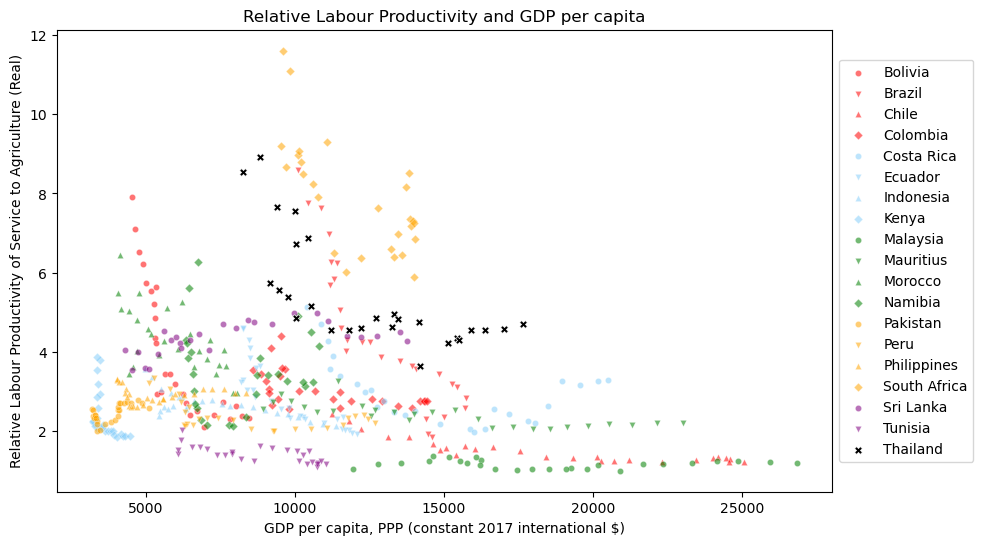

In [33]:
### Scatter plot of GDP per capita and Relative Productivity of Service to Agriculture sector. Using only the top 20 countries.
plt.figure(figsize=(10, 6))

## Plot other countries.
colors = ['red', 'lightskyblue', 'green', 'orange', 'purple', 'violet', 'navy', 'grey']
markers = ['o', 'v', '^', 'D']

### Get unique combinations of colors and markers.
color_marker_combinations = [(color, marker) for color in colors for marker in markers] ## Use this to plot the other countries.

### Plot the other countries.
for i, country in enumerate(Merged_df_Real_subset[Merged_df_Real_subset['country'] != 'Thailand']['country'].unique()):
    sns.scatterplot(data=Merged_df_Real_subset[Merged_df_Real_subset['country'] == country], x='GDP', y='Real_SERV_VA_per_EMP_Relative_to_Agriculture', label=country, color=color_marker_combinations[i][0], marker=color_marker_combinations[i][1], alpha = 0.55, s = 20)

## Plot Thailand.
sns.scatterplot(data=Merged_df_Real_subset[Merged_df_Real_subset['country'] == 'Thailand'], x='GDP', y='Real_SERV_VA_per_EMP_Relative_to_Agriculture', label='Thailand', marker='X', color = 'black',  s =30)

# Axes labels
plt.xlabel('GDP per capita, PPP (constant 2017 international $)')
plt.ylabel('Relative Labour Productivity of Service to Agriculture (Real)')

# Add title
plt.title('Relative Labour Productivity and GDP per capita')

# Show legend. Outside the plot.
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)